Read the example yelt with allocated loss. Event loss is allocated into two variables.

In [1]:
import pandas as pd
from cattbl import yeareventallocloss, yeareventloss, yearloss

yealt = pd.read_csv("tests/_data/example_allocated_loss.csv")
yealt = yealt.set_index(['Year', 
                         'ModelID', 'EventID', 'DayOfYear', 
                         'RegionID', 'LossSourceID'])['Loss']
yealt.attrs['n_yrs'] = 1e5
yealt.attrs['col_event'] = ['ModelID', 'EventID', 'DayOfYear']
display(yealt.to_frame())

Loss
Year   ModelID EventID DayOfYear RegionID LossSourceID             
1      Model1  33305   232       1        1              230.119784
                                 2        1               10.497604
                                 3        1             2299.957367
               45902   189       1        3              377.762359
                                 2        2               36.644882
...                                                             ...
99999  Model2  83257   282       2        5              821.325049
                                 3        2              404.704981
100000 Model2  48460   315       1        4              369.656625
                                 2        4              448.438454
                                 3        2              198.161888

[449139 rows x 1 columns]

Calculate the AAL on the allocated part

In [2]:
print(f"AAL = {yealt.yeal.aal:,.0f}")
number_format = "{:,.0f}"
pd.options.display.float_format = '{:,.0f}'.format
display(yealt.yeal.aal_split('RegionID').to_frame().T)
display(yealt.yeal.aal_split(['RegionID', 'LossSourceID']).to_frame().T)

AAL = 8,674


RegionID,1,2,3,4
AAL,"2,866","2,777","2,810",221


RegionID       1                   2                   3                  4  \
LossSourceID   1   2   3   4   5   1   2   3   4   5   1   2   3   4   5  1   
AAL          603 499 624 577 563 604 575 463 537 598 599 547 497 506 661 28   

RegionID                  
LossSourceID  2  3  4  5  
AAL          99 38 33 23

In [9]:
# Get a total YLT
ylt_total = yealt.yeal.to_ylt()
ylt_total = ylt_total.to_frame().join(ylt_total.yl.exprob())
ylt_total['ReturnPeriod'] = 1 / ylt_total['ExProb']
ylt_total.sort_values('ReturnPeriod', ascending=False)

,Loss,ExProb,ReturnPeriod
Year,,,
22644,"36,284,372",0,"100,000"
79142,"16,637,613",0,"50,000"
54662,"12,056,465",0,"33,333"
10432,"10,799,834",0,"25,000"
79360,"10,075,399",0,"20,000"
...,...,...,...
15814,"1,000",1,1
44281,"1,000",1,1
35831,"1,000",1,1


In [4]:
# Get a YLT split by region
ylt_byreg = (yealt
             .yeal.to_yelt(splitby='RegionID')
             .yel.to_ylt())
             
display(ylt_byreg.loc[ylt_total.sort_values('Loss', ascending=False).index])

RegionID,1,2,3,4
Year,,,,
22644,"8,066,132","12,277,605","15,940,635",0
79142,"10,887,877","1,825,119","3,924,617",0
54662,"3,414,113","8,016,555","625,798",0
10432,"6,457,597","3,784,722","557,515",0
79360,"4,644,614","1,658,884","3,771,900",0
...,...,...,...,...
15814,159,535,306,0
44281,284,386,330,0
35831,278,427,295,0


<AxesSubplot:xlabel='ReturnPeriod'>

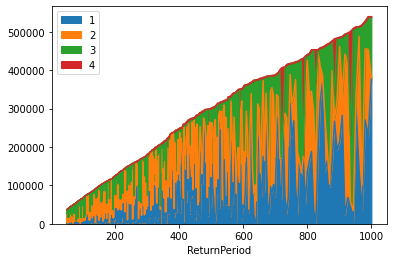

In [5]:
# Plot the EP contribution
import matplotlib.pyplot as plt

# Subset of years to plot
years = ylt_total.loc[(ylt_total['ExProb'] <= 1/50 ) & (ylt_total['ExProb'] >= 1/1000)].index

fig, axs = plt.subplot(1, 2)

(ylt_byreg
 .loc[years]
 .join(ylt_total['ReturnPeriod'])
 .assign(ReturnPeriod=lambda df: 1 / df['ExProb'])
 .set_index('ReturnPeriod')
 .drop('ExProb', axis=1)
 .sort_index()
 .plot.area()
)

In [6]:
# Get an EP curve for each region
(yealt
 .yeal.to_yelt()
 .yel.to_ep_summaries((2, 5, 10, 20, 50, 100, 200))
)

CurveType,YearLoss,MaxEventLoss
ReturnPeriod,,
2,"2,607","1,795"
5,"6,910","4,368"
10,"11,510","8,073"
20,"18,854","14,736"
50,"37,227","32,771"
100,"67,766","62,450"
200,"124,962","117,476"


In [7]:
# Get the EP curve contribution for each region